# Unsupervised Learning --> k Means Clustering

## Einlesen der notwendigen Bibliotheken


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics

# dieser Datensatz ist so grundlegend, den kann man direkt einladen lassen
from sklearn.datasets import load_iris

import warnings
warnings.simplefilter("ignore")

In [2]:
# importieren des IRIS-Datensatzes und festlegen den Variablen
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Metadaten:
Der berühmte Iris-Datensatz:
Der Datensatz besteht aus 50 Messungen von drei Arten der Pflanze Iris (Iris setosa, Iris virginica and Iris versicolor). Es wurden jeweils die 4 Merkmale vermessen: Länge und Breite der Kelchblätter sowie Länge und Breite der Kronblätter (jeweils in cm). Basierend auf der Kombination der vier Grundmerkmale entwickelte Fischer (1936) eine Möglichkeit, diese Arten voneinander zu unterscheiden. Dieser Datensatz ist ein grundlegender Testdatensatz für verschiedene ML-Anwendungen.
Quellen: 
* R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188. doi:10.1111/j.1469-1809.1936.tb02137.x. hdl:2440/15227
* https://en.wikipedia.org/wiki/Iris_flower_data_set

In [13]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[550.8953333333334,
 86.39021984551397,
 31.37135897435897,
 19.47712336396547,
 13.916908757908757,
 11.040239971910452,
 9.209408730158732,
 7.679235060690944,
 6.541584461432288,
 5.574092540026044]

## Plot Elbow
* wcss = within cluster sum of squares
* Der KMeans-Algorithmus clustert Daten, indem er Stichproben in n Gruppen mit gleicher Varianz aufteilt und dabei ein Kriterium minimiert, das als Inertia oder Quadratsumme innerhalb des Clusters (wcss) bekannt ist
* wcss ist für alle Samples n aufsummierter Abstand zwischen den Samples zum Zentroid (Mittelwert in einem Cluster) --> Minimal!
* Entscheidungshilfe zur Festlegung der Anzahl der Cluster

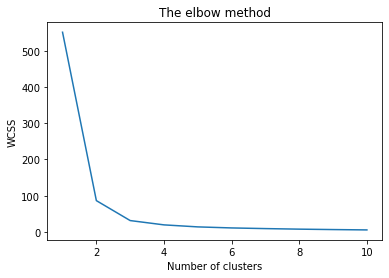

In [14]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## Visualisieren der Ergebnisse

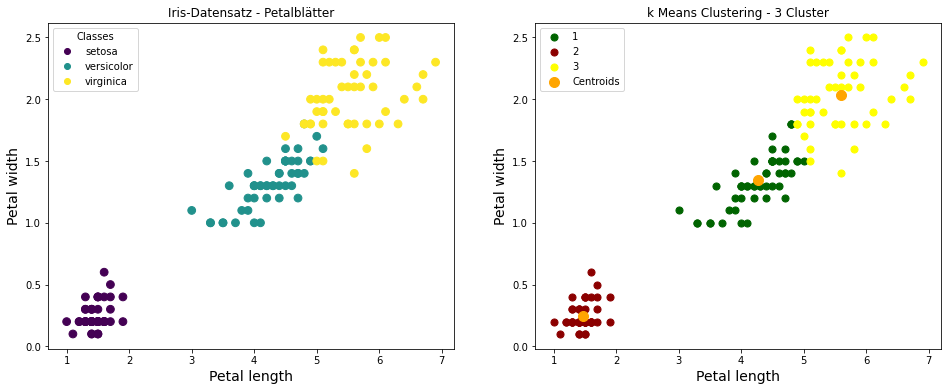

In [15]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
labels = kmeans.labels_

cmap_bold = sns.color_palette("bright", 5)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Iris-Datensatz - Petalblätter')

scatter=plt.scatter(iris.data[:, 2], iris.data[:, 3], s = 60, c=iris.target)
plt.legend(scatter.legend_elements()[0], iris.target_names, loc="upper left", title="Classes")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.subplot(1,2,2)
plt.title('k Means Clustering - 3 Cluster')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'darkgreen', label = '1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'darkred', label = '2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'yellow', label = '3')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'orange', label = 'Centroids')

plt.legend()

plt.show()

## Interne Metrik - Silhouette coefficient s
Source: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

* liegt zwischen -1 (keine Clusters) und + 1 (dichte Cluster), s = 0 ist ein Anzeichen für sehr überlappende Cluster
* s nahe an 1 - die Cluster sind gut voneinander getrennt und dicht


In [16]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.6604800083974887

## Externe Metrik - Vergleich mit den Labels im Datensatz
### Bsp.: Rand-Index R = (a+b)/M
* Der Rand-Index ist eine Funktion, die die Ähnlichkeit der beiden Zuordnungen misst
* Rand-Index kann verwendet werden, um alle Arten von Clustering-Algorithmen zu vergleichen
* a: True Positive (TP): Anzahl der Paare von Datenpunkten, die im gleichen Cluster sowohl im erstellten Clustering als auch in den Ground-Truth-Klassen (vor-klassifizierten Cluster) sind.
* b: True Negative (TN): Anzahl der Paare von Datenpunkten, die in unterschiedlichen Clustern sowohl im erstellten Clustering als auch in den Ground-Truth-Klassen sind.
* M: Anzahl der Paare, die aus n Datenpunkten gebildet werden können M = n(n-1)/2
* **perfektes Labeling bedeutet R = 1.0**
* Der Rand-Index variiert zwischen 0 und 1. Ein Rand-Index von 1 zeigt an, dass das Clustering perfekt mit den Ground-Truth-Klassen übereinstimmt, während ein Rand-Index von 0 darauf hinweist, dass das Clustering keine Ähnlichkeit mit den Ground-Truth-Klassen aufweist. In der Praxis wird der Rand-Index oft verwendet, um die Leistung von Clustering-Algorithmen zu bewerten, insbesondere wenn die Ground-Truth-Klassen bekannt sind.

In [17]:
metrics.rand_score(iris.target, labels)

0.9495302013422818

### Bsp.: V-Score
* misst homogeneity und completeness innerhalb der Cluster - "Reinheit" der Cluster
* Homogeneity: alle Samples in einem Cluster gehören zu einer gelabelten Gruppe
* Completeness: alle Mitglieder einer gelabelten Gruppe sind in einem Cluster
* für perfektes Clustering ist der V score = 1 (nahe 0 --> keine sinnvollen Cluster erzeugt)

In [18]:
metrics.v_measure_score(iris.target, labels)

0.8641855068202222